In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec
import numpy as np
import os

### Read In

In [3]:
datapath = "/Users/00090336/Data/gridflagtest/"
# smeared_grid = np.load(os.path.join(datapath,"smeared.npy"))
vis_grid = np.load(os.path.join(datapath,"vis.npy"))
psf_grid = np.load(os.path.join(datapath,"psf.npy"))
pcf_grid = np.load(os.path.join(datapath,"pcf.npy"))
# print(f"smeared_grid: {smeared_grid.dtype}")
print(f"vis_grid: {vis_grid.shape}")
print(f"psf_grid: {psf_grid.shape}")
print(f"pcf_grid: {pcf_grid.shape}")

# smeared_grid1 = np.load("smeared_grid.npy")
vis_grid1 = np.load("../vis.npy")
psf_grid1 = np.load("../psf.npy")
pcf_grid1 = np.load("../pcf.npy")

vis_grid: (107, 1, 1024, 1024)
psf_grid: (107, 1, 1024, 1024)
pcf_grid: (107, 1, 1024, 1024)


### Prep data

In [4]:
def smear_grid(pcf, ksize=3):
    s = np.zeros(pcf.shape, dtype=np.float32)
    pcfinite = np.isfinite(pcf)
    for f in range(pcf.shape[0]):
        for x in range(pcf.shape[1]):
            for y in range(pcf.shape[2]):
                if pcfinite[f,x,y]:
                    if type(ksize) is not np.ndarray:
                        ks = int(ksize/2)
                    else:
                        ks = int(ksize[f,x,y]/2)
                    if ks < 3:
                        ks = 3
                    s[f,x-ks:x+ks+1, y-ks:y+ks+1] += pcf[f,x,y].real
    s[s == 0] = np.nan
    return s

In [5]:
v0 = vis_grid[:,0]
v0[v0 == 0] = np.nan

v1 = vis_grid1[:,0]
v1[v1 == 0] = np.nan

pc0 = pcf_grid[:,0]
pc0[pc0 == 0] = np.nan

pc1 = pcf_grid1[:, 0]
pc1[pc1 == 0] = np.nan

s0 = smear_grid(pc0, ksize=abs(pc0.imag/pc0.real))

s1 = smear_grid(pc1, ksize=abs(pc1.imag/pc1.real))

### Plot Data

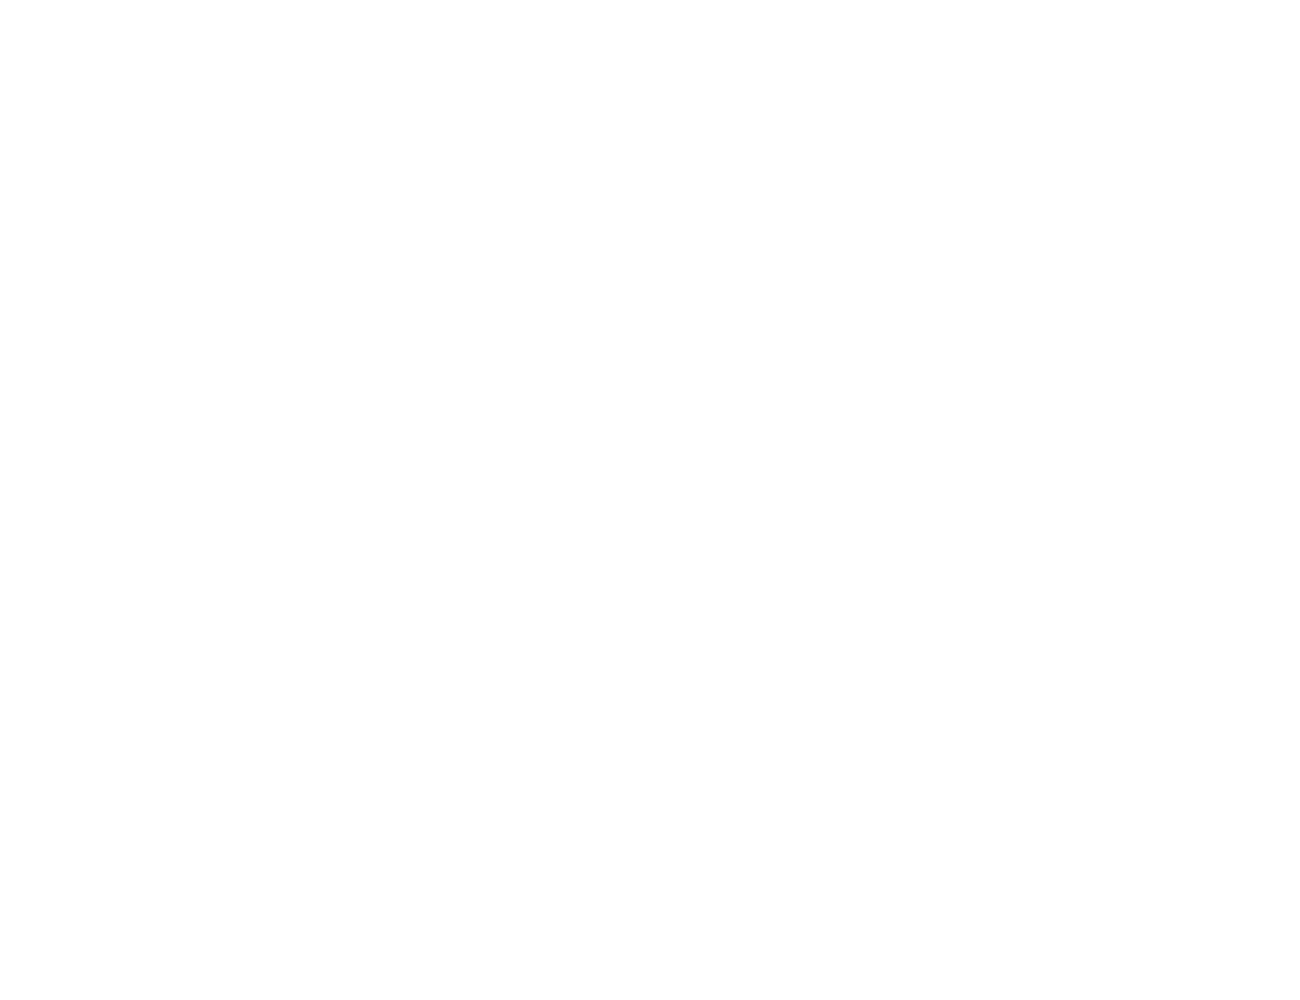

In [12]:
dfig = plt.figure(figsize=(13,10))
dfig.set_tight_layout(1)

In [13]:
dfig.clear()
ax = dfig.subplots(3,4)
titles = ("abs(vis0)", "abs(vis1)", "pcf0.imag/pcf1.real", "pcf1.imag/pcf1.real",
          "pcf0.real", "pcf1.real", "s0.real", "s1.real", 
          "abs(vis0/pcf0.real)", "abs(vis1/pcf1.real)", "abs(vis0/s0.real)", "abs(vis1/s1.real)")
arrays = (np.abs(v0[40]), np.abs(v1[40]), pc0[40].imag/pc0[40].real, pc1[40].imag/pc1[40].real,
          pc0[40].real, pc1[40].real, s0[40], s1[40],
          np.abs(v0[40]/pc0[40].real), np.abs(v1[40]/pc1[40].real), np.abs(v0[40]/s0[40]), np.abs(v1[40]/s1[40]))
for i, ar in enumerate(arrays):
    if ar is None:
        ax.flatten()[i].axis("off")
    else:
        ax.flatten()[i].matshow(ar)
        ax.flatten()[i].set(title=titles[i], xlim=(200,800), ylim=(200,800))

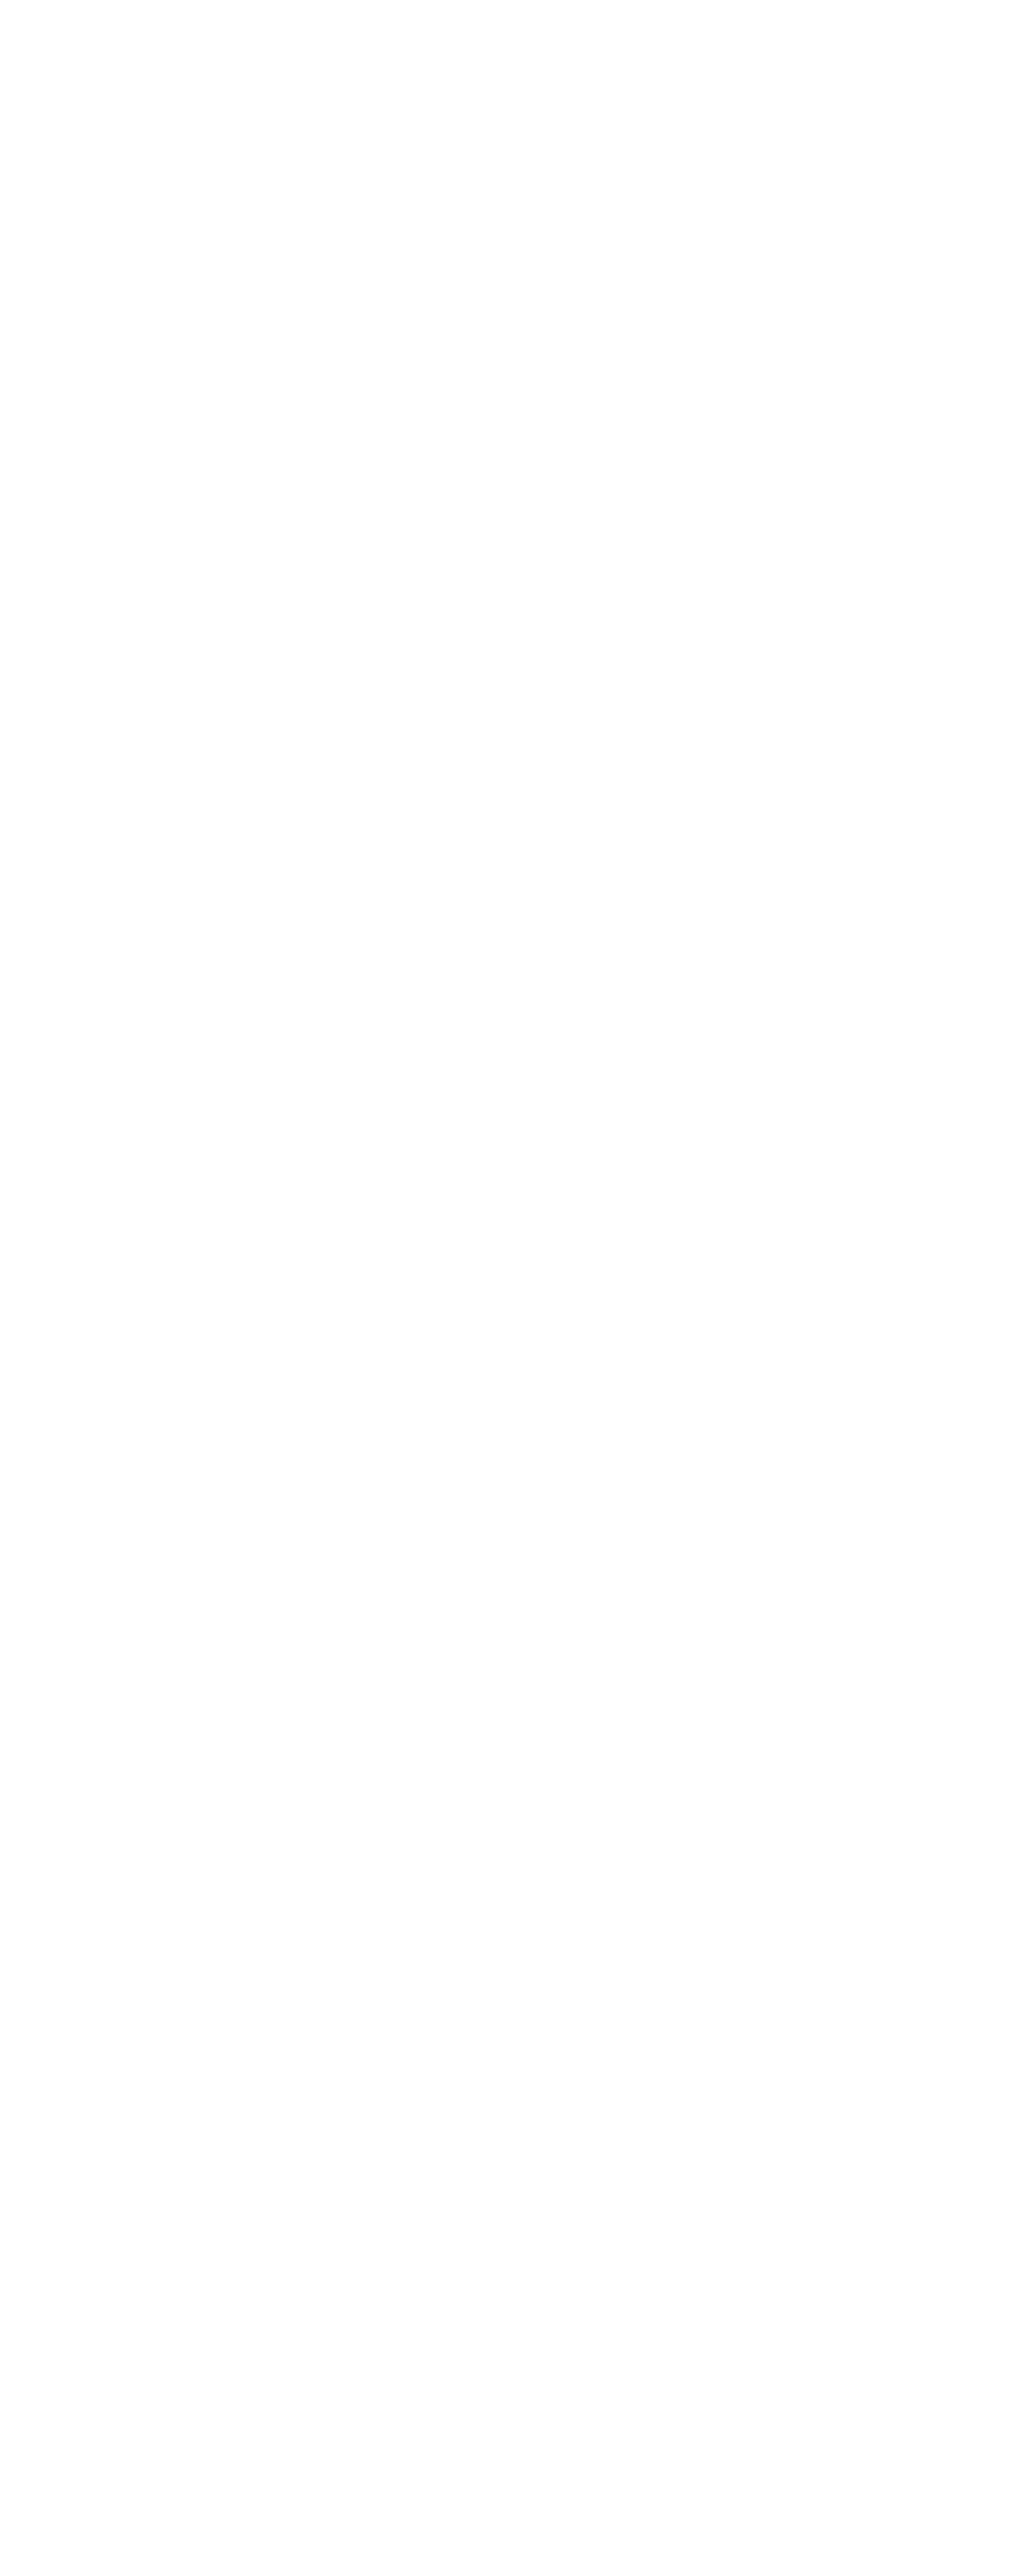

In [8]:
pcffig = plt.figure(figsize=(12,30))
pcffig.tight_layout()

In [97]:
pcffig.clear()
ax = pcffig.subplots(3,1).flatten()
ax[0].matshow(np.log(np.abs(v1[40])), cmap='Greens')
ax[1].matshow(np.log(s1[40].real), cmap='Greens')
b = ax[2].matshow(np.isfinite(np.abs(v1[40])).astype(int)+np.isfinite(s1[40]).astype(int), cmap='Set3')

pc0_occ = abs(pc1[40].imag/pc1[40].real)/2
# pc0_occ[np.isfinite(pc0_occ)] = 1
occ_title = ("visgrid", "smeared pcf", "occupancy comparison")
for i,a in enumerate(ax):
    a.set(xlim=(200,800), ylim=(200,800), title=occ_title[i])
    a.matshow(pc0_occ,vmin=0, vmax=1, cmap='Reds')
ax[2].set(xlim=(200,800), ylim=(200,800))
pcffig.colorbar(b)

### Make Histograms

In [89]:
fullarrays = (np.abs(v0), np.abs(v1), pc0.imag/pc0.real, pc1.imag/pc1.real,
          pc0.real, pc1.real, s0, s1,
          np.abs(v0/pc0.real), np.abs(v1/pc1.real), np.abs(v0/s0), np.abs(v1/s1))

hists = [np.histogram(x[np.isfinite(x)], 1000) if x is not None else None for x in fullarrays]
hist = np.array([x[0] if x is not None else None for x in hists])
bins = np.array([x[1] if x is not None else None for x in hists])
xvals = [(x[1:] + x[:-1])/2 if x is not None else None for x in bins]

shists = [np.histogram(x[np.isfinite(x)], 1000) if x is not None else None for x in [np.std(y, axis=0, where=np.isfinite(y)) if y is not None else None for y in fullarrays]]
shist = np.array([x[0] if x is not None else None for x in shists])
sbins = np.array([x[1] if x is not None else None for x in shists])
sxvals = [(x[1:] + x[:-1])/2 if x is not None else None for x in sbins]

/Users/00090336/miniconda3/envs/gridflag_nb/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/00090336/miniconda3/envs/gridflag_nb/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/00090336/miniconda3/envs/gridflag_nb/lib/python3.10/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


### Plot Histograms

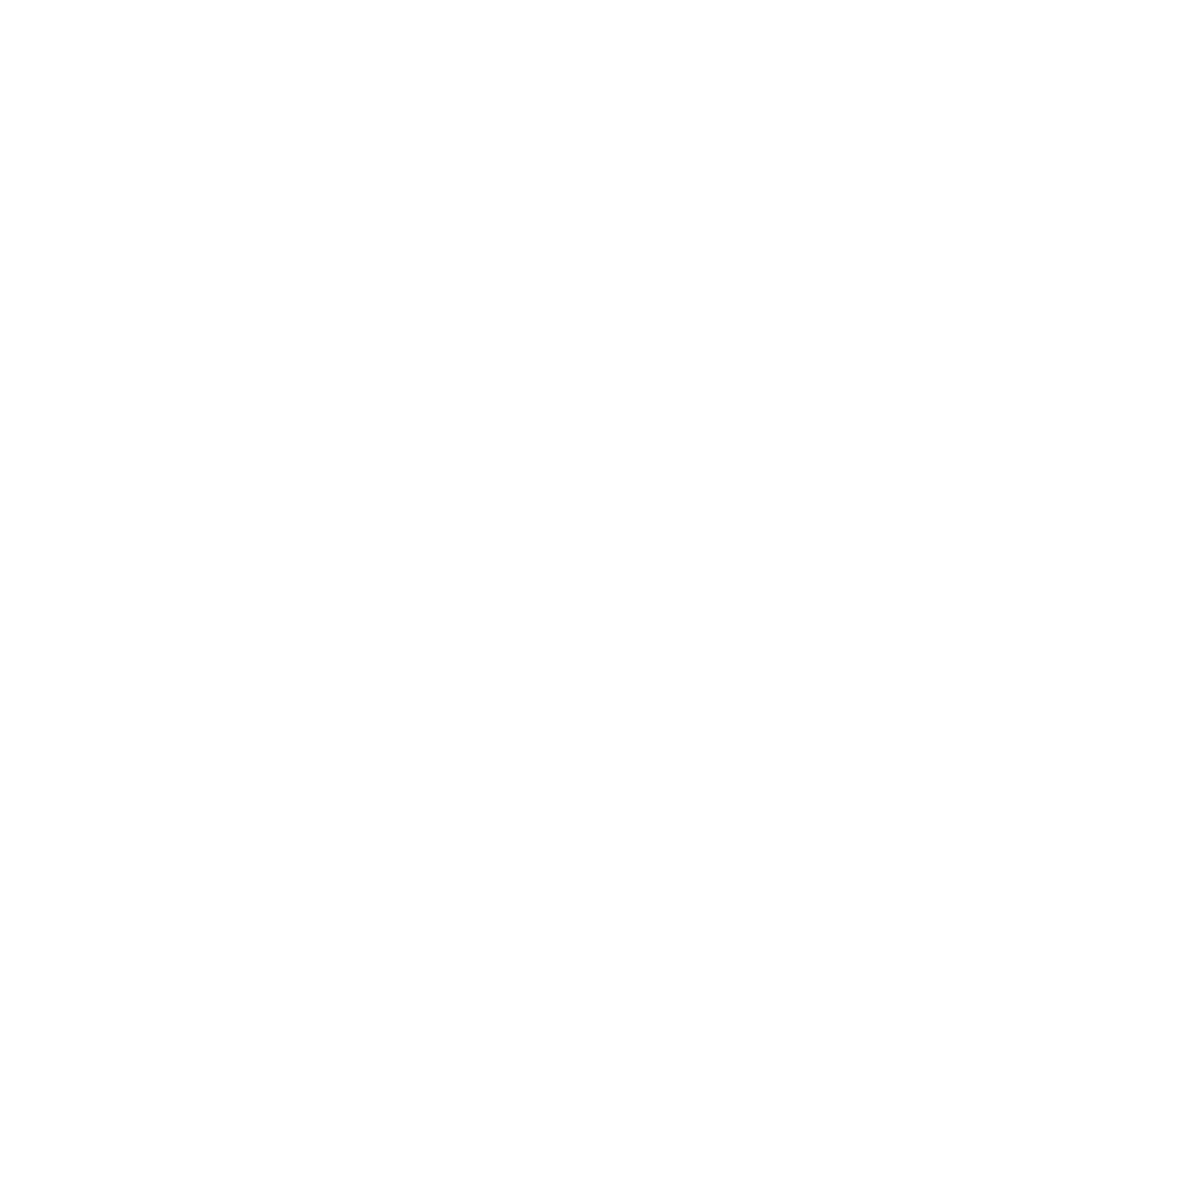

In [90]:
hfig = plt.figure(figsize=(12,12))
hfig.set_tight_layout(1)

In [93]:
hfig.set_size_inches(10,10)

In [92]:
hfig.clear()
ax = hfig.subplots(3,4)
hfig.suptitle("Pixel counts per value")

col = 'b'
for i, title in enumerate(titles):
    if hist[i] is None:
        ax.flatten()[i].axis("off")
    else:
        ax.flatten()[i].plot(xvals[i],hist[i], '.',color=col, markeredgecolor='k')
        ax.flatten()[i].step(xvals[i],hist[i], where='mid',color=col, alpha=0.2)
        ax.flatten()[i].set(yscale='log', xlim=(None,None), title=title)

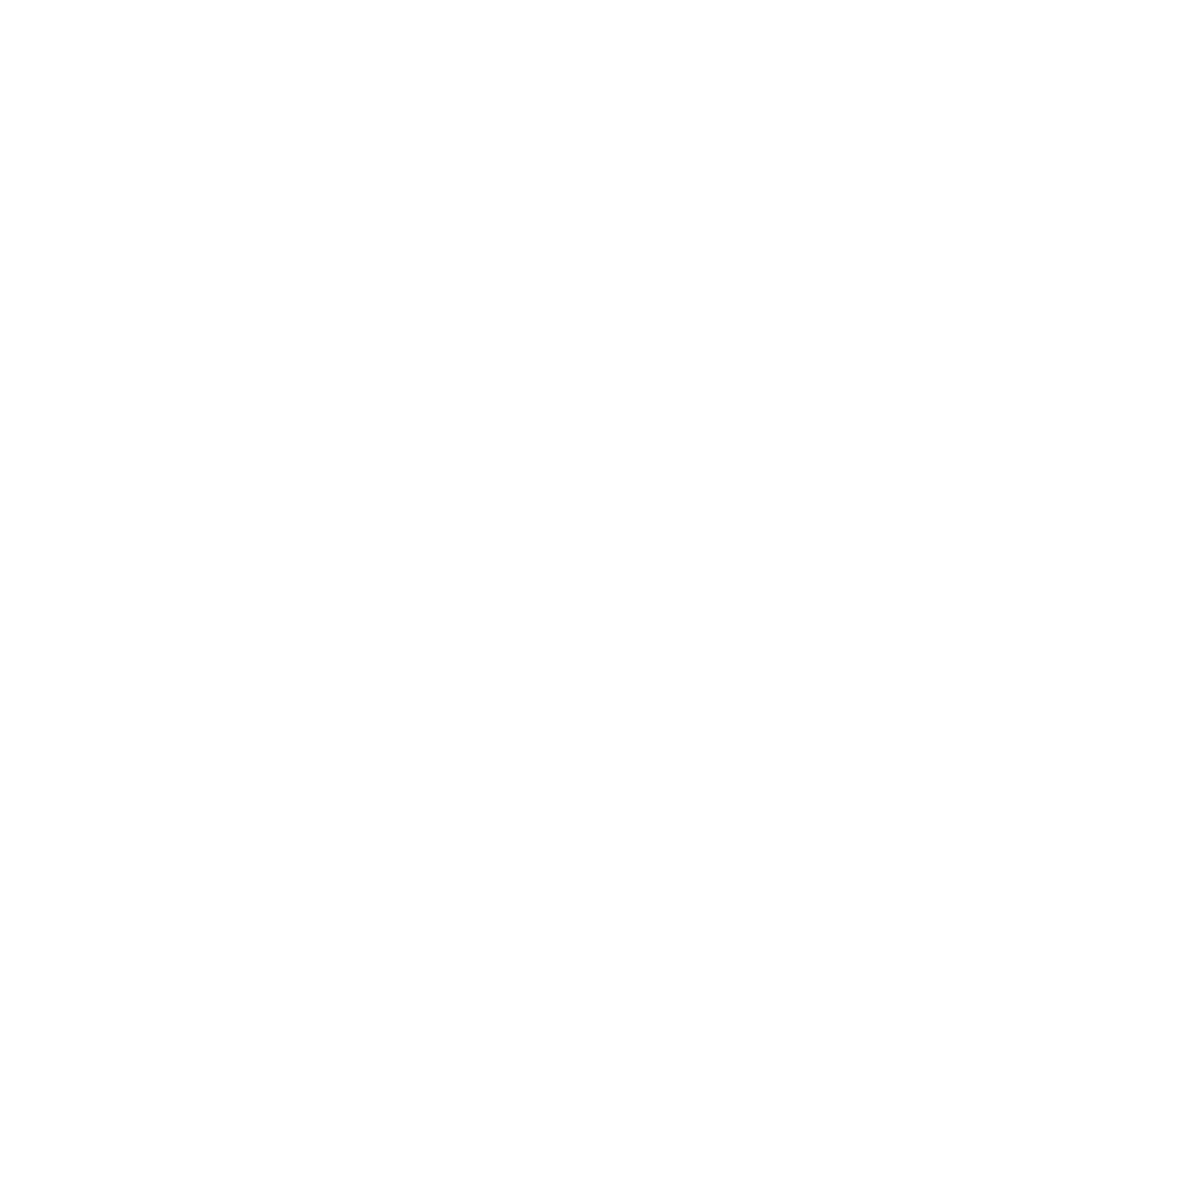

In [28]:
hfig2 = plt.figure(figsize=(12,12))
hfig2.set_tight_layout(1)

In [29]:
hfig2.clear()
ax = hfig2.subplots(3,4)
hfig2.suptitle("Std along frequency axis")
for i, title in enumerate(titles):
    if shist[i] is None:
        ax.flatten()[i].axis("off")
    else:
        ax.flatten()[i].plot(sxvals[i],shist[i], '.',color=col, markeredgecolor='k')
        ax.flatten()[i].step(sxvals[i],shist[i], where='mid',color=col, alpha=0.2)
        ax.flatten()[i].set(yscale='log', xlim=(0, None), title=title)

### Plot cube

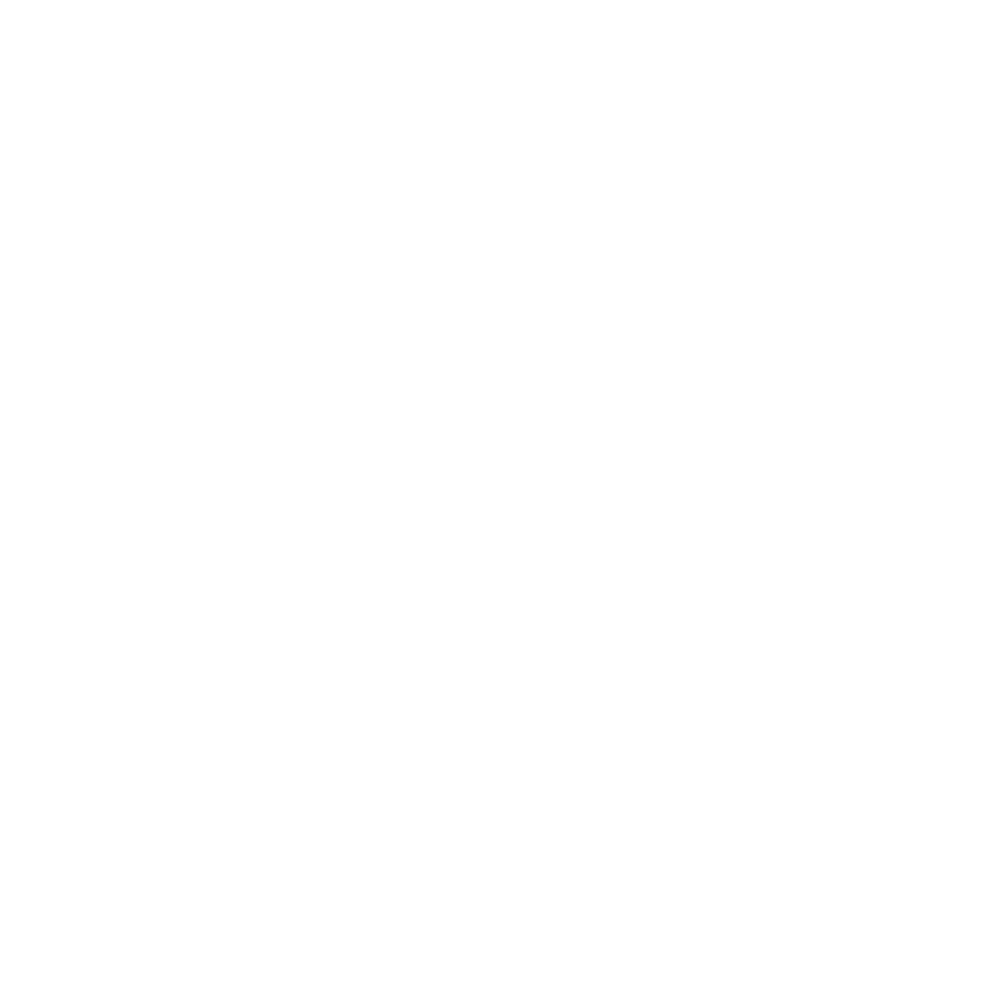

In [6]:
cfig = plt.figure(figsize=(10,10), layout='constrained')

In [11]:
cfig.set_size_inches(8,8)

In [14]:
prop = 0.9
cmap = 'Reds'

In [15]:
nvis = np.abs(v0/s0)
mv0 = nvis[np.isfinite(nvis)].max()
propval = mv0 * (1-prop)
vmask = np.bitwise_and(np.isfinite(nvis), nvis >= propval)

nvis2 = np.abs(v1/s1)
mv1 = nvis2[np.isfinite(nvis2)].max()
propval1 = mv1 * (1-prop)
vmask1 = np.bitwise_and(np.isfinite(nvis2), nvis2 >= propval)

In [16]:
hist, bins = np.histogram(nvis[np.isfinite(nvis)], 1000)
xvals = (bins[1:] + bins[:-1])/2

hist2, bins = np.histogram(nvis2[np.isfinite(nvis2)], 1000)
xvals2 = (bins[1:] + bins[:-1])/2

In [17]:
cfig.clear()
gs = GridSpec(5,5, figure=cfig)
ax = cfig.add_subplot(gs[0:4, 0:5], projection='3d')
x,y,z = np.mgrid[0:nvis.shape[0], 0:nvis.shape[1], 0:nvis.shape[2]]
a = ax.scatter3D(x[vmask], y[vmask], z[vmask], c=nvis[vmask], s=nvis[vmask]*100,marker='.',vmin=0, alpha=0.5, cmap=cmap)
x,y,z = np.mgrid[0:nvis2.shape[0], 0:nvis2.shape[1], 0:nvis2.shape[2]]
cfig.colorbar(a, label='abs(vis/smeared)')
a = ax.scatter3D(x[vmask1], y[vmask1], z[vmask1], c=nvis2[vmask1], s=nvis2[vmask1]*100, marker='.', vmin=0, alpha=0.5, cmap='Greens')
cfig.colorbar(a)
ax.set(xlim=(0, nvis.shape[0]),
       ylim=(200,800),
       zlim=(200, 800),
       xlabel='Channels')


ax = cfig.add_subplot(gs[4, :])
ax.scatter(xvals, hist, marker='.', c=xvals, s=xvals*100, cmap=cmap, label='RFI')
ax.step(xvals, hist, where='mid', color='k', alpha=0.2)
ax.vlines([propval], color='red', linestyles='dashed', ymin=0, ymax=hist.max(), alpha=0.5)
ax.scatter(xvals2, hist2, marker='.', c=xvals2, s=xvals2*100, cmap='Greens', label='source')
ax.step(xvals2, hist2, where='mid', color='k', alpha=0.2)
ax.vlines([propval], color='g', linestyles='dashed', ymin=0, ymax=hist2.max(), alpha=0.5)
ax.set(yscale='log', 
       xlim=(0,None), 
       ylim=(0, None),
       xlabel='abs(vis/smeared)')
leg = ax.legend()
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('green')

/var/folders/r_/5_7vfq057t5g1s7xy9hsbhd518n8zd/T/ipykernel_7162/1141369091.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set(yscale='log',
/var/folders/r_/5_7vfq057t5g1s7xy9hsbhd518n8zd/T/ipykernel_7162/1141369091.py:28: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color('red')
/var/folders/r_/5_7vfq057t5g1s7xy9hsbhd518n8zd/T/ipykernel_7162/1141369091.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1].set_color('green')


### Close Plots

In [36]:
plt.close('all')